<a href="https://colab.research.google.com/github/valenmonsalveu/Int_Artificial_Proyecto/blob/main/modelo_con_procesado_One_Hot_Encoding_y_logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Competencia kaggle**
- Descargar la base de datos desde Kaggle


In [ ]:
# Instrucciones para descargar y configurar el dataset desde Kaggle:
# 1. Obtén tu archivo kaggle.json desde tu cuenta de Kaggle:
#    - Ir a Kaggle > Cuenta > Crear nuevo API Token.
#    - Esto descargará un archivo kaggle.json en tu computadora.
#
# 2. Sube el archivo kaggle.json a Google Colab usando el siguiente código:
from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242


Saving kaggle.json to kaggle.json
 45% 9.00M/20.1M [00:00<00:00, 62.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 95.2MB/s]


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


**inspeccion de datos**

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


**cargar la base de datos train.csv con pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

z.head()

shape of loaded dataframe (692500, 12)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


**Exploracion de datos**

In [ ]:
# 1. Información general sobre el dataframe
print("\nInformación general del dataframe:")
print(z.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object

# Modelo utilizando 2 columnas
Inspeccionar visualmente si el estrato y el departamento tienen un comportamiento distintivo con respecto a lo que queremos predecir.

In [ ]:
!pip install rlxutils
#Modelo utilizando 2 columnas
#Inspeccionar visualmente si el estrato y el departamento tienen un comportamiento distintivo con respecto a lo que queremos predecir.





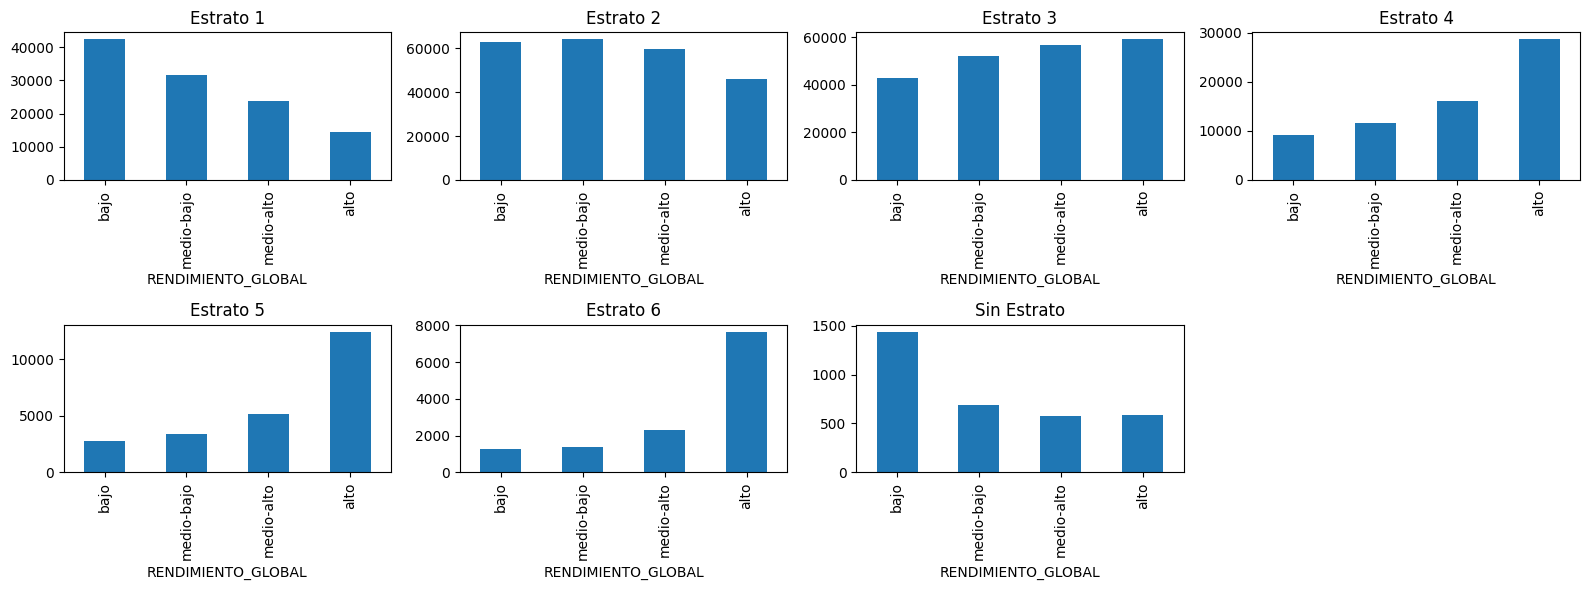

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

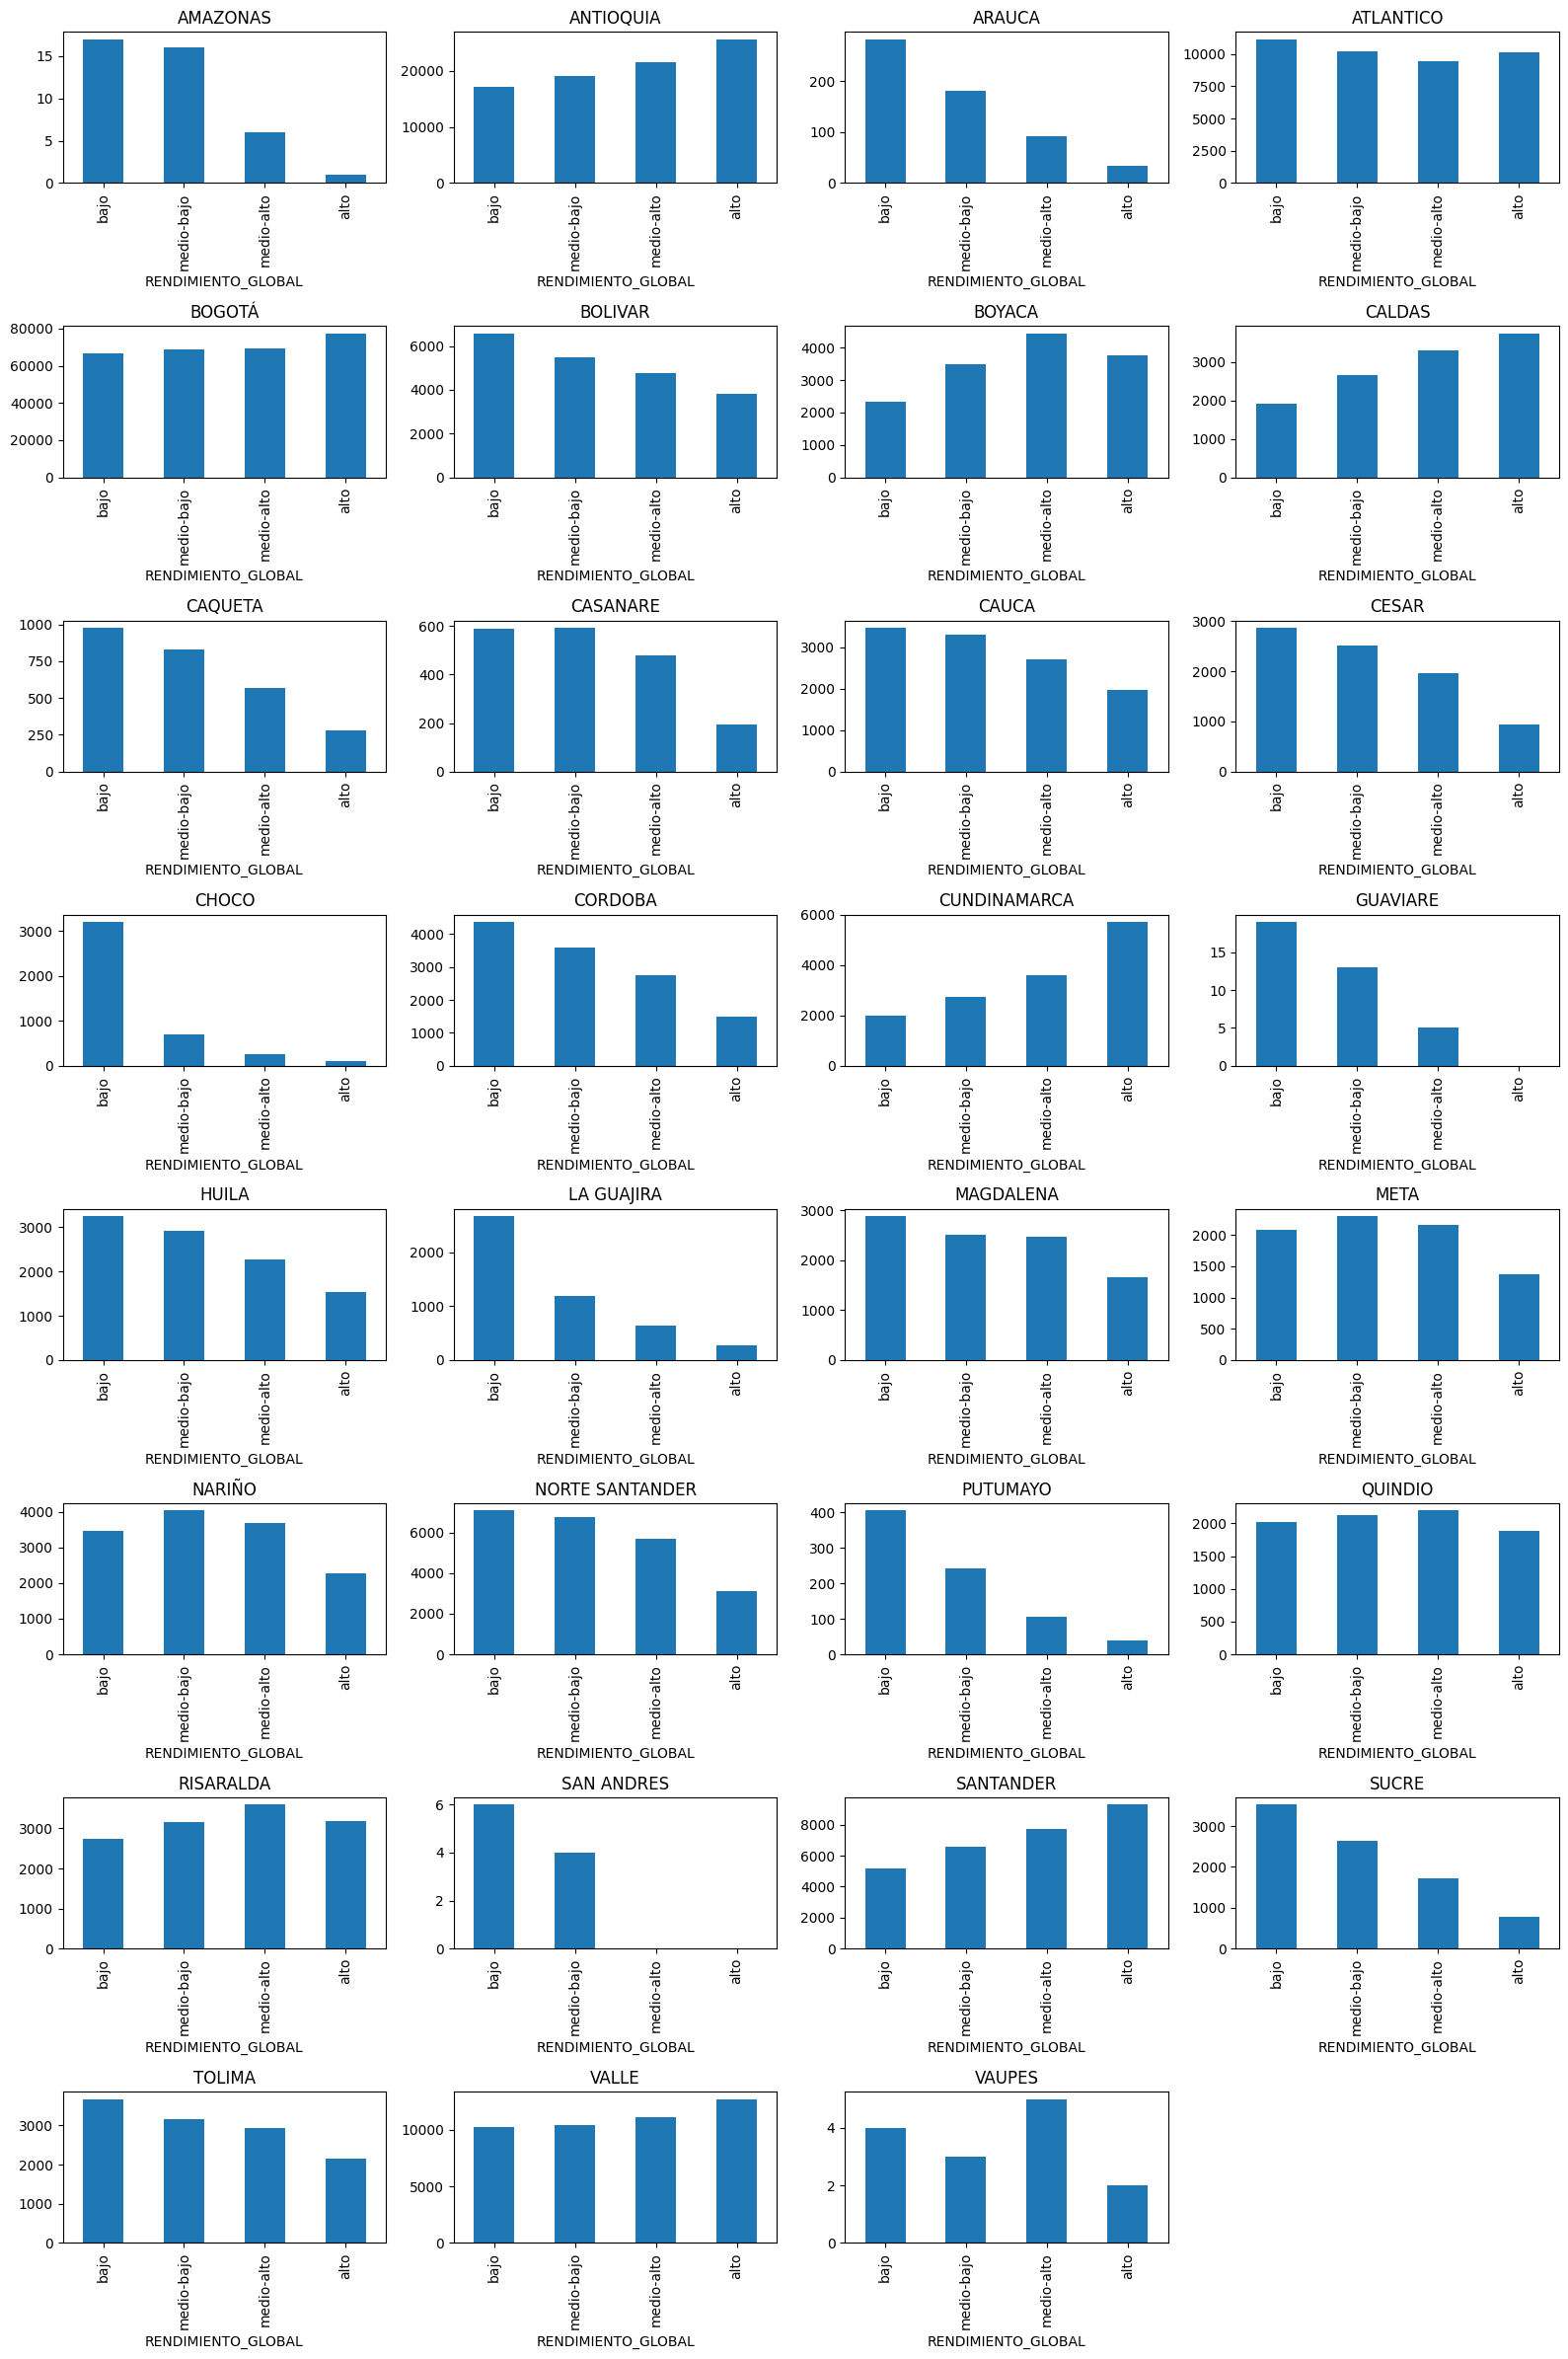

In [ ]:
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    # Obtener el valor contable de RENDIMIENTO_GLOBAL
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    # Indexar nuevamente la serie de valore incluyendo las categorias deseadas
    # Rellenando los datos faltantes con  0
    categories = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
    counts = counts.reindex(categories, fill_value=0)
    counts.plot(kind='bar', ax=ax) # Plotting on the provided ax
    plt.title(ci)

# modelo utilizando FAMI_ESTRATOVIVIENDA y ESTU_PRGM_DEPARTAMENTO
Tenemos que predecir la columna RENDIMIENTO_GLOBALusando el resto.

usaremos columnas


*   FAMI_ESTRATOVIVIENDA necesitaremos convertir a una codificación continua
*   ESTU_PRGM_DEPARTAMENTO  necesitaremos convertir a una codificación onehot




In [ ]:
z = z[['FAMI_ESTRATOVIVIENDA', 'ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']]
z.head()

,FAMI_ESTRATOVIVIENDA,ESTU_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL
0,Estrato 3,BOGOTÁ,medio-alto
1,Estrato 3,ATLANTICO,bajo
2,Estrato 3,BOGOTÁ,bajo
3,Estrato 4,SANTANDER,alto
4,Estrato 3,ANTIOQUIA,medio-bajo


# Limpieza básica


In [ ]:
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())

(32137, 0)

Sustituiremos nanlos valores con un símbolo preestablecido para marcarlos.

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.values[z.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.ESTU_PRGM_DEPARTAMENTO.isna())

(0, 0)

# Limpieza de FAMI_ESTRATOVIVIENDA

In [ ]:
cmap = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 1,
    'no info': 1
}
# Mapea los valores y convierte a una lista de numpy
z.FAMI_ESTRATOVIVIENDA = np.array([cmap[i] for i in z.FAMI_ESTRATOVIVIENDA])

# Cuenta los valores y ordena los resultados
sorted_counts = z.FAMI_ESTRATOVIVIENDA.value_counts().sort_index()

print(sorted_counts)


FAMI_ESTRATOVIVIENDA
1    147417
2    232671
3    210685
4     65514
5     23608
6     12605
Name: count, dtype: int64


# Limpieza ESTU_PRGM_DEPARTAMENTO


In [ ]:
#Preprocesado de ESTU_PRGM_DEPARTAMENTO (one-hot encoding)
# Convertimos los valores categóricos únicos en one-hot encoding
x = z.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i, val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}

# Aplicamos la codificación one-hot a cada valor en la columna ESTU_PRGM_DEPARTAMENTO
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in z.ESTU_PRGM_DEPARTAMENTO]]

# Convertimos la matriz resultante en un DataFrame para añadir al DataFrame original
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(
    ESTU_PRGM_DEPARTAMENTO_onehot_enc,
    columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_vals]
)

# Concatenamos el DataFrame con el original y eliminamos la columna original de ESTU_PRGM_DEPARTAMENTO
z = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, z], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)

# Comprobamos la nueva forma del DataFrame y visualizamos las primeras filas
z.shape
z.head()

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,medio-alto
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,bajo
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,bajo
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,alto
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,medio-bajo


# Convertir la columna de destino (predicción) en valores discretos
Ahora todo en nuestro conjunto de datos es numérico

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1


Dificultades:
Decidir qué variables son más importantes para el rendimiento fue difícil. Por ejemplo, no está claro si factores como el departamento académico del estudiante (ESTU_PRGM_DEPARTAMENTO) influyen significativamente en el rendimiento.
Aún estamos en proceso de realizar análisis exploratorios más profundos y ajustar la importancia de las variables antes de construir modelos predictivos.



A medida que se avanza en el preprocesamiento, surgen más decisiones sobre cómo imputar, transformar y normalizar los datos, lo que requiere tiempo y experimentación.
Probablemente enfrentemos nuevas dificultades a medida que integremos modelos predictivos, pero estamos aprendiendo a lidiar con los datos de manera más eficiente.

Construir X y y entrenar un modelo
Observe que ordenamos las columnas para asegurarnos de que siempre obtengamos el mismo orden.

In [ ]:
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 32), (692500,))

Dividir en tres y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 32), (138500, 32), (554000,), (138500,))

Hacer un modelo RandomForestRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtr, ytr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

obtener predicciones

In [ ]:

preds_ts = model.predict(Xts)
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [ ]:
print (preds_tr[:20])
print (preds_ts[:20])

[0 0 3 3 2 3 3 2 0 3 3 3 0 3 0 3 2 3 2 0]
[3 3 3 0 0 3 0 3 3 0 0 3 0 0 3 3 0 3 0 0]


Obtenga matrices de precisión y confusión

In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.33493140794223825, 0.3365776173285199)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

Observe cómo cada fila en la matriz de confusión suma 1. ¿Qué significa esto?

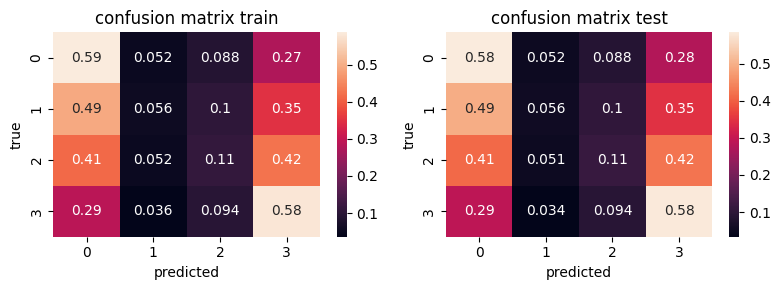

In [ ]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

observar:

No hay RENDIMIENTO_GLOBALcolumna
Debemos conservar los ID para poder crear correctamente el archivo de envío.

In [ ]:
zt = pd.read_csv("test.csv")
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [ ]:
zt_ids = zt['ID'].values
zt = zt[['ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 2)


,ESTU_PRGM_DEPARTAMENTO,FAMI_ESTRATOVIVIENDA
0,BOLIVAR,Estrato 3
1,ANTIOQUIA,Estrato 2
2,BOGOTÁ,Estrato 3
3,SUCRE,Estrato 1
4,ATLANTICO,Estrato 2


In [ ]:
zt.ESTU_PRGM_DEPARTAMENTO.values[zt.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'


In [ ]:
zt = zt.copy()
zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]

In [ ]:


# Reemplaza valores específicos en la columna ESTU_PRGM_DEPARTAMENTO
zt.ESTU_PRGM_DEPARTAMENTO = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.ESTU_PRGM_DEPARTAMENTO.values]

# Aplica one-hot encoding usando un diccionario de mapeo para ESTU_PRGM_DEPARTAMENTO
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in zt.ESTU_PRGM_DEPARTAMENTO]]

# Convierte el resultado en un DataFrame
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])

# Concatenar el DataFrame con el original y eliminar la columna original ESTU_PRGM_DEPARTAMENTO
zt = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, zt], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)

# Verifica la forma del DataFrame final
zt.shape


(296786, 32)

In [ ]:
zt

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES,FAMI_ESTRATOVIVIENDA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
296782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
296783,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
296784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


crear X matriz y predecir

In [ ]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 32)

In [ ]:
preds_test_data = model.predict(X_test_data)

preparar la presentación

In [ ]:
# inverse mapping
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [ ]:
# create dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,bajo
296783,239074,alto
296784,963852,alto


In [ ]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,medio-bajo
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

Envía tu propuesta a Kaggle


In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "val with logistic-regression"

100% 3.91M/3.91M [00:00<00:00, 18.5MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia